

Чек-лист:
0. Изучите файл annotation.txt. Там содержится информация о датасете.
1. Загрузите датасет data.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите линейную модель. Напишите в markdown свои наблюдения по полученным результатам.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.decomposition import PCA

import pandas_profiling

In [4]:
data = pd.read_csv('data.csv')
data.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           NaN      2,156,624,900                 796   
1  Albania1987           NaN      2,156,624,900                 796   
2  Albania1987           NaN      2,156,624,900                 796   
3  Albania1987           NaN      2,156,624,900                 796   
4  Albania1987           NaN      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [6]:
data.describe()

suicides_no    population  suicides/100k pop  HDI for year  \
count  27820.000000  2.782000e+04       27820.000000   8364.000000   
mean     242.574407  1.844794e+06          12.816097      0.776601   
std      902.047917  3.911779e+06          18.961511      0.093367   
min        0.000000  2.780000e+02           0.000000      0.483000   
25%        3.000000  9.749850e+04           0.920000      0.713000   
50%       25.000000  4.301500e+05           5.990000      0.779000   
75%      131.000000  1.486143e+06          16.620000      0.855000   
max    22338.000000  4.380521e+07         224.970000      0.944000   

       gdp_per_capita ($)  
count        27820.000000  
mean         16866.464414  
std          18887.576472  
min            251.000000  
25%           3447.000000  
50%           9372.000000  
75%          24874.000000  
max         126352.000000

- Есть пропуски в HDI for year и достаточно много, чтобы просто удалить. Надо будет смотреть и скорей всего заменять на значения
- Есть типы object и float64, int64
- И несмотря на то, что данные gdp_for_year выглядят как числовые, они строковые. Скорей всего надо будет перевести их в float64
- В suicides_no разброс значений подозрительно большой - от минимального до max. Надо будет посмотреть на выбросы.И большая разница между mean и std. 

In [7]:
data[data['HDI for year'].isnull()]

sex          age  suicides_no  population  suicides/100k pop  \
0        male  15-24 years           21      312900               6.71   
1        male  35-54 years           16      308000               5.19   
2      female  15-24 years           14      289700               4.83   
3        male    75+ years            1       21800               4.59   
4        male  25-34 years            9      274300               3.28   
...       ...          ...          ...         ...                ...   
27755  female    75+ years            7      318983               2.19   
27756  female  35-54 years           65     3263931               1.99   
27757  female  55-74 years           15     1105076               1.36   
27758    male   5-14 years           37     2805898               1.32   
27759  female   5-14 years           18     2678474               0.67   

         country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0         Albania1987           NaN      2,156,624,900                 796   
1         Albania1987           NaN      2,156,624,900                 796   
2         Albania1987           NaN      2,156,624,900                 796   
3         Albania1987           NaN      2,156,624,900                 796   
4         Albania1987           NaN      2,156,624,900                 796   
...               ...           ...                ...                 ...   
27755  Uzbekistan2009           NaN     33,689,223,673                1332   
27756  Uzbekistan2009           NaN     33,689,223,673                1332   
27757  Uzbekistan2009           NaN     33,689,223,673                1332   
27758  Uzbekistan2009           NaN     33,689,223,673                1332   
27759  Uzbekistan2009           NaN     33,689,223,673                1332   

            generation  
0         Generation X  
1               Silent  
2         Generation X  
3      G.I. Generation  
4              Boomers  
...                ...  
27755           Silent  
27756          Boomers  
27757           Silent  
27758     Generation Z  
27759     Generation Z  

[19456 rows x 10 columns]

In [8]:
data.groupby(['country-year','HDI for year']).count()['sex']
# Получается какие-то года попадают в NaN
# Мне кажется, что одинаковые года в каждой стране( это придает оптимизма)

country-year             HDI for year
Albania1995              0.619           12
Albania2000              0.656           12
Albania2005              0.695           12
Albania2010              0.722           12
Antigua and Barbuda2012  0.781           12
                                         ..
Uzbekistan2010           0.655           12
Uzbekistan2011           0.661           12
Uzbekistan2012           0.668           12
Uzbekistan2013           0.672           12
Uzbekistan2014           0.675           12
Name: sex, Length: 697, dtype: int64

In [9]:
# Сделаем выборку по годам, все показатель HDI for year, достаточно глобальный, может можно вывести закономерность

data[data['country-year'].str.contains('1987') ].head(10)

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   
5  female    75+ years            1       35600               2.81   
6  female  35-54 years            6      278800               2.15   
7  female  25-34 years            4      257200               1.56   
8    male  55-74 years            1      137500               0.73   
9  female   5-14 years            0      311000               0.00   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           NaN      2,156,624,900                 796   
1  Albania1987           NaN      2,156,624,900                 796   
2  Albania1987           NaN      2,156,624,900                 796   
3  Albania1987           NaN      2,156,624,900                 796   
4  Albania1987           NaN      2,156,624,900                 796   
5  Albania1987           NaN      2,156,624,900                 796   
6  Albania1987           NaN      2,156,624,900                 796   
7  Albania1987           NaN      2,156,624,900                 796   
8  Albania1987           NaN      2,156,624,900                 796   
9  Albania1987           NaN      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers  
5  G.I. Generation  
6           Silent  
7          Boomers  
8  G.I. Generation  
9     Generation X

In [10]:
len(data[data['country-year'].str.contains('1987')])

648

In [11]:
data_1987 = data[data['country-year'].str.contains('1987') ]

In [12]:
data_1987.head()


sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           NaN      2,156,624,900                 796   
1  Albania1987           NaN      2,156,624,900                 796   
2  Albania1987           NaN      2,156,624,900                 796   
3  Albania1987           NaN      2,156,624,900                 796   
4  Albania1987           NaN      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [13]:
data_1987.info()
# получается по 1987 году нет значений по всем странам. ТОгда посмотрю значения в близлежаших годах

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 27255
Data columns (total 10 columns):
sex                   648 non-null object
age                   648 non-null object
suicides_no           648 non-null int64
population            648 non-null int64
suicides/100k pop     648 non-null float64
country-year          648 non-null object
HDI for year          0 non-null float64
 gdp_for_year ($)     648 non-null object
gdp_per_capita ($)    648 non-null int64
generation            648 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 55.7+ KB


In [14]:
data[data['country-year'].str.contains('1986') ].head(10)
 
#    Не могу пока за что-нибудь зачепиться. Поэтому заменю NaN на 0,
#    чтобы можно было работать -делать суммы и сред взначения и тд.
#   Я видела, что минимальное значение больше 0, так что реальную картину не испорьчу. 

sex          age  suicides_no  population  suicides/100k pop  \
276  female  15-24 years            0        7668                0.0   
277  female  25-34 years            0        6209                0.0   
278  female  35-54 years            0        6101                0.0   
279  female   5-14 years            0        6907                0.0   
280  female  55-74 years            0        3764                0.0   
281  female    75+ years            0        1014                0.0   
282    male  15-24 years            0        7563                0.0   
283    male  25-34 years            0        6023                0.0   
284    male  35-54 years            0        5947                0.0   
285    male   5-14 years            0        6827                0.0   

                country-year  HDI for year  gdp_for_year ($)   \
276  Antigua and Barbuda1986           NaN        290,440,148   
277  Antigua and Barbuda1986           NaN        290,440,148   
278  Antigua and Barbuda1986           NaN        290,440,148   
279  Antigua and Barbuda1986           NaN        290,440,148   
280  Antigua and Barbuda1986           NaN        290,440,148   
281  Antigua and Barbuda1986           NaN        290,440,148   
282  Antigua and Barbuda1986           NaN        290,440,148   
283  Antigua and Barbuda1986           NaN        290,440,148   
284  Antigua and Barbuda1986           NaN        290,440,148   
285  Antigua and Barbuda1986           NaN        290,440,148   

     gdp_per_capita ($)       generation  
276                4740     Generation X  
277                4740          Boomers  
278                4740           Silent  
279                4740     Generation X  
280                4740  G.I. Generation  
281                4740  G.I. Generation  
282                4740     Generation X  
283                4740          Boomers  
284                4740           Silent  
285                4740     Generation X

In [15]:
data['HDI for year']= data['HDI for year'].replace(np.nan, 0.0)

In [16]:
data.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           0.0      2,156,624,900                 796   
1  Albania1987           0.0      2,156,624,900                 796   
2  Albania1987           0.0      2,156,624,900                 796   
3  Albania1987           0.0      2,156,624,900                 796   
4  Albania1987           0.0      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [17]:
# Посмотрим среднее значение по годам( мы же знаем там где ноль, то это распространяется на все страны)
data_mean = data.groupby('country-year').mean()[['HDI for year']].sort_values('HDI for year', ascending = False).reset_index()

In [18]:
data_mean.head()
# Мне нужен год, чтобы я могла по возрастанию выстроить дф, хотя попробую попроще. 

country-year  HDI for year
0   Norway2014         0.944
1   Norway2013         0.942
2   Norway2012         0.942
3   Norway2011         0.941
4   Norway2010         0.940

In [19]:
data_mean[data_mean['country-year'].str.contains('1984') ].head(10)
#  нет проще не получается, я же не знаю какие года есть!

Empty DataFrame
Columns: [country-year, HDI for year]
Index: []

In [20]:
data_mean.head()

country-year  HDI for year
0   Norway2014         0.944
1   Norway2013         0.942
2   Norway2012         0.942
3   Norway2011         0.941
4   Norway2010         0.940

In [21]:
import re

In [22]:
def year (country):
    return re.findall('\d+',country )

In [23]:
data_mean['year'] = data_mean['country-year'].apply(year)
data_mean.head()

# Я же список получила :( из года. Что делать, чтобы можно было работать

country-year  HDI for year    year
0   Norway2014         0.944  [2014]
1   Norway2013         0.942  [2013]
2   Norway2012         0.942  [2012]
3   Norway2011         0.941  [2011]
4   Norway2010         0.940  [2010]

In [24]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 3 columns):
country-year    2321 non-null object
HDI for year    2321 non-null float64
year            2321 non-null object
dtypes: float64(1), object(2)
memory usage: 54.5+ KB


In [25]:
def year_1 (country):
   
    y = re.sub(r'(\[)(\d{4})(\])',r'\2', country)
    y= int(y)
    return y

In [26]:
year_1('[2012]')

2012

In [27]:
#data_mean['year_1'] = data_mean['year'].apply(year_1)
#data_mean.head()

# не поняла, почему не работает на дф

In [28]:
def year_2 (country):
    y = re.findall('\d+',country )
    y =  y[0]
    return y

In [29]:
year_2('Norway2014')

'2014'

In [30]:
#data_mean['year_2'] = data_mean['country-year'].apply(year_1)
#data_mean.head()


In [31]:
data_mean.head()

country-year  HDI for year    year
0   Norway2014         0.944  [2014]
1   Norway2013         0.942  [2013]
2   Norway2012         0.942  [2012]
3   Norway2011         0.941  [2011]
4   Norway2010         0.940  [2010]

In [32]:
# Посмотрела разбор лабораторной!!
data_mean['year'] = data_mean['country-year'].str[-4:].astype("int")
data_mean['country']= data_mean['country-year'].str[:-4]
# Круто! и все просто

In [33]:
data_mean.head()

country-year  HDI for year  year country
0   Norway2014         0.944  2014  Norway
1   Norway2013         0.942  2013  Norway
2   Norway2012         0.942  2012  Norway
3   Norway2011         0.941  2011  Norway
4   Norway2010         0.940  2010  Norway

## Начнем заново. 
***Первый путь в некуда *

In [34]:
# Начнем занаво! 

data = pd.read_csv('data.csv')
data.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           NaN      2,156,624,900                 796   
1  Albania1987           NaN      2,156,624,900                 796   
2  Albania1987           NaN      2,156,624,900                 796   
3  Albania1987           NaN      2,156,624,900                 796   
4  Albania1987           NaN      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

### Моя идея заключается в том, что я хочу попробовать заполнить NaN средним значением между соседними годами по каждой стране. Возможно не получится, но я еще раз попробую. 

In [35]:
# Разделю дс на два по признаку NaN
data_nan = data[data['HDI for year'].isnull()]
data_nan.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           NaN      2,156,624,900                 796   
1  Albania1987           NaN      2,156,624,900                 796   
2  Albania1987           NaN      2,156,624,900                 796   
3  Albania1987           NaN      2,156,624,900                 796   
4  Albania1987           NaN      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [36]:
data.shape

(27820, 10)

In [37]:
data_nan.shape

(19456, 10)

In [38]:
data = data.dropna()

In [39]:
data.shape

(8364, 10)

In [40]:
# вот теперь выясню реальное среднее значение 
data_mean = (
    data
    .groupby('country-year') #  сгруппировала по стране
    .mean()[['HDI for year']] #  среднее значение 
    .sort_values('country-year', ascending = True) # по алфавиту 
    .reset_index() # разиндексовала (сама придумала слово :))
)

In [41]:
data_mean.head()
# Значения совпадают. Конечно, ведь там где 0 , он по всем странам. Сама себя запутала.

country-year  HDI for year
0              Albania1995         0.619
1              Albania2000         0.656
2              Albania2005         0.695
3              Albania2010         0.722
4  Antigua and Barbuda2012         0.781

In [42]:
data_mean.shape

(697, 2)

In [43]:
data_nan['HDI for year']= data_nan['HDI for year'].replace(np.nan, 0.0)

In [44]:
data_nan.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           0.0      2,156,624,900                 796   
1  Albania1987           0.0      2,156,624,900                 796   
2  Albania1987           0.0      2,156,624,900                 796   
3  Albania1987           0.0      2,156,624,900                 796   
4  Albania1987           0.0      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [45]:
data_nan['country-year'].value_counts()
# многовато

Serbia1999       12
Ireland1989      12
Georgia1991      12
Colombia1999     12
Israel1991       12
                 ..
Mongolia2016     10
Hungary2016      10
Thailand2016     10
Armenia2016      10
Mauritius2016    10
Name: country-year, Length: 1624, dtype: int64

In [46]:
data.head()

sex          age  suicides_no  population  suicides/100k pop  \
72    male  25-34 years           13      232900               5.58   
73    male  55-74 years            9      178000               5.06   
74  female    75+ years            2       40800               4.90   
75  female  15-24 years           13      283500               4.59   
76    male  15-24 years           11      241200               4.56   

   country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
72  Albania1995         0.619      2,424,499,009                 835   
73  Albania1995         0.619      2,424,499,009                 835   
74  Albania1995         0.619      2,424,499,009                 835   
75  Albania1995         0.619      2,424,499,009                 835   
76  Albania1995         0.619      2,424,499,009                 835   

         generation  
72     Generation X  
73           Silent  
74  G.I. Generation  
75     Generation X  
76     Generation X

In [47]:
# Проработаю свою задачу на дс без 0-вых значений
data['year'] = data['country-year'].str[-4:].astype("int") # 
data['country']= data['country-year'].str[:-4]# 

In [48]:
data.head()

sex          age  suicides_no  population  suicides/100k pop  \
72    male  25-34 years           13      232900               5.58   
73    male  55-74 years            9      178000               5.06   
74  female    75+ years            2       40800               4.90   
75  female  15-24 years           13      283500               4.59   
76    male  15-24 years           11      241200               4.56   

   country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
72  Albania1995         0.619      2,424,499,009                 835   
73  Albania1995         0.619      2,424,499,009                 835   
74  Albania1995         0.619      2,424,499,009                 835   
75  Albania1995         0.619      2,424,499,009                 835   
76  Albania1995         0.619      2,424,499,009                 835   

         generation  year  country  
72     Generation X  1995  Albania  
73           Silent  1995  Albania  
74  G.I. Generation  1995  Albania  
75     Generation X  1995  Albania  
76     Generation X  1995  Albania

In [49]:
try:
    data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].str.replace(",","").astype("int64")
except Exception as e:
    pass

# Это пока для меня не  очень понятно. Просто взяла как увидела на разборе

In [50]:
data.columns

Index(['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation', 'year', 'country'],
      dtype='object')

In [51]:
data.head()

sex          age  suicides_no  population  suicides/100k pop  \
72    male  25-34 years           13      232900               5.58   
73    male  55-74 years            9      178000               5.06   
74  female    75+ years            2       40800               4.90   
75  female  15-24 years           13      283500               4.59   
76    male  15-24 years           11      241200               4.56   

   country-year  HDI for year   gdp_for_year ($)   gdp_per_capita ($)  \
72  Albania1995         0.619          2424499009                 835   
73  Albania1995         0.619          2424499009                 835   
74  Albania1995         0.619          2424499009                 835   
75  Albania1995         0.619          2424499009                 835   
76  Albania1995         0.619          2424499009                 835   

         generation  year  country  
72     Generation X  1995  Albania  
73           Silent  1995  Albania  
74  G.I. Generation  1995  Albania  
75     Generation X  1995  Albania  
76     Generation X  1995  Albania

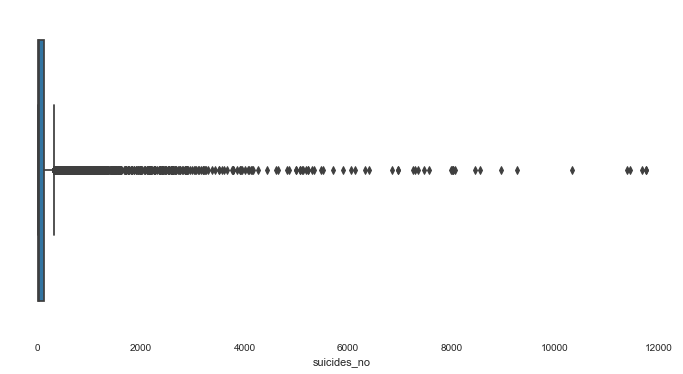

In [52]:
# Осталось посмотреть на выбросы переменную suicides_no
plt.figure(figsize=(12,6))
sns.boxplot(x=data['suicides_no'])

In [53]:
data[data['suicides_no'] > 10000]

sex          age  suicides_no  population  suicides/100k pop  \
27089  male  35-54 years        10332    42835394              24.12   
27149  male  35-54 years        11767    42798501              27.49   
27161  male  35-54 years        11681    42566273              27.44   
27173  male  35-54 years        11763    42326226              27.79   
27186  male  35-54 years        11396    42085688              27.08   
27198  male  35-54 years        11455    41858354              27.37   

            country-year  HDI for year   gdp_for_year ($)   \
27089  United States2005         0.897      13093726000000   
27149  United States2010         0.909      14964372000000   
27161  United States2011         0.911      15517926000000   
27173  United States2012         0.912      16155255000000   
27186  United States2013         0.913      16691517000000   
27198  United States2014         0.915      17427609000000   

       gdp_per_capita ($)    generation  year        country  
27089               47423       Boomers  2005  United States  
27149               51989  Generation X  2010  United States  
27161               53452  Generation X  2011  United States  
27173               55170  Generation X  2012  United States  
27186               56520  Generation X  2013  United States  
27198               58531  Generation X  2014  United States

In [54]:
len(data[data['suicides_no'] > 10000])
# не похоже на выброс(реальные цифры). Оставлю

6

In [55]:
# Посмотрим коррекляцию 
data.profile_report()

In [56]:
data.columns

Index(['sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation', 'year', 'country'],
      dtype='object')

- корреляция прослеживается между количественными значениями :
    - population и suicides_no
    - gdp_for_year и population 
    - HDI for year и gdp_per_capita
- а так же между generation и age (здесь корреляция достаточно высокая, можно оставить одно из двух)

In [57]:
data_result = data.drop(['country-year'], axis=1)

In [58]:
data_result.head()

sex          age  suicides_no  population  suicides/100k pop  \
72    male  25-34 years           13      232900               5.58   
73    male  55-74 years            9      178000               5.06   
74  female    75+ years            2       40800               4.90   
75  female  15-24 years           13      283500               4.59   
76    male  15-24 years           11      241200               4.56   

    HDI for year   gdp_for_year ($)   gdp_per_capita ($)       generation  \
72         0.619          2424499009                 835     Generation X   
73         0.619          2424499009                 835           Silent   
74         0.619          2424499009                 835  G.I. Generation   
75         0.619          2424499009                 835     Generation X   
76         0.619          2424499009                 835     Generation X   

    year  country  
72  1995  Albania  
73  1995  Albania  
74  1995  Albania  
75  1995  Albania  
76  1995  Albania

In [59]:
data_result = data_result.drop(['generation'], axis=1)

In [60]:
def sex (sex):
    if sex == 'male':
        return 1
    if sex == 'female':
        return 2

In [61]:
data_result['sex'] = data_result['sex'].apply(sex)

#  Надеюсь я правильно сделала, что заменила номинативную переменную в цифрову бинарную

In [62]:
data_result.head()

sex          age  suicides_no  population  suicides/100k pop  \
72    1  25-34 years           13      232900               5.58   
73    1  55-74 years            9      178000               5.06   
74    2    75+ years            2       40800               4.90   
75    2  15-24 years           13      283500               4.59   
76    1  15-24 years           11      241200               4.56   

    HDI for year   gdp_for_year ($)   gdp_per_capita ($)  year  country  
72         0.619          2424499009                 835  1995  Albania  
73         0.619          2424499009                 835  1995  Albania  
74         0.619          2424499009                 835  1995  Albania  
75         0.619          2424499009                 835  1995  Albania  
76         0.619          2424499009                 835  1995  Albania

In [63]:
# остались две категориальные переменные. Их будем кодировать
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder)

In [64]:
labelEnc = LabelEncoder()

In [65]:
data_result['age_enc'] = labelEnc.fit_transform(data['age'])
data_result.drop(['age'], axis=1, inplace=True)

In [66]:
data_result.sample(2)

sex  suicides_no  population  suicides/100k pop  HDI for year  \
4504    2           80     3285641               2.43         0.746   
542     2            0       15193               0.00         0.781   

       gdp_for_year ($)   gdp_per_capita ($)  year              country  \
4504       2465188674415               13283  2012               Brazil   
542           1211411704               13657  2012  Antigua and Barbuda   

      age_enc  
4504        5  
542         2

In [67]:
data_result['country_enc'] = labelEnc.fit_transform(data['country'])
data_result.drop(['country'], axis=1, inplace=True)
data_result.sample(2)

sex  suicides_no  population  suicides/100k pop  HDI for year  \
7357     2           19      602033               3.16         0.866   
15315    2            1       27800               3.60         0.752   

        gdp_for_year ($)   gdp_per_capita ($)  year  age_enc  country_enc  
7357         227948349666               23010  2011        0           23  
15315          4738559685               13743  1985        0           49

In [68]:
# Колонка для прогнозирования 
target_col = ['suicides/100k pop']

In [69]:
# делим на признаки и таргетную переменную
X = data_result.drop(['suicides/100k pop'],axis=1)
y = data_result['suicides/100k pop']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size =0.8)

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
# Создаем модель деревья решений
# Выбираем 100 деревьев в качестве параметра
model=RandomForestRegressor(n_estimators=100)

In [74]:
# Обучаем модель
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

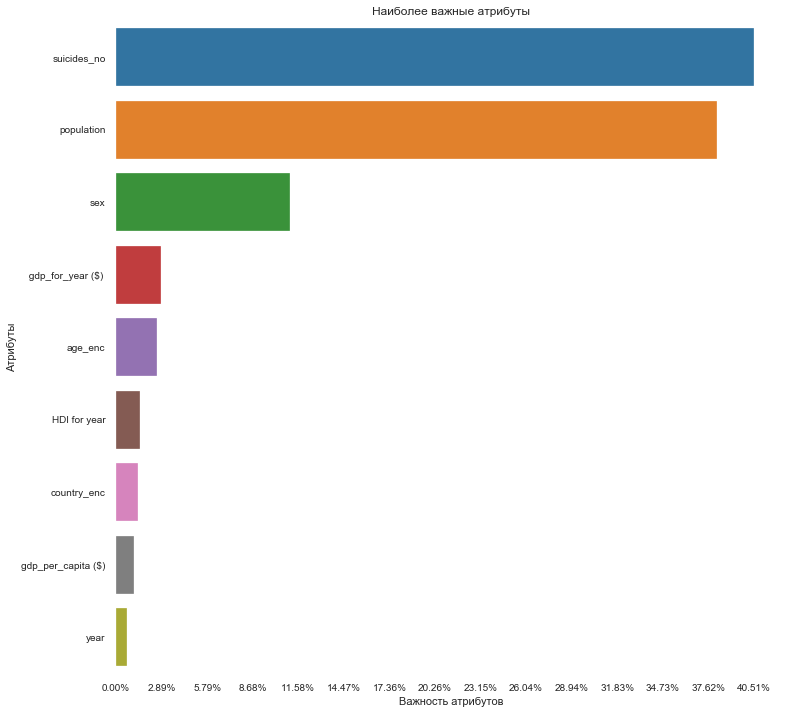

0
suicides_no         0.405140
population          0.381471
sex                 0.110639
 gdp_for_year ($)   0.028665
age_enc             0.026204
HDI for year        0.015428
country_enc         0.013965
gdp_per_capita ($)  0.011576
year                0.006912

In [75]:
headers = list(X_train.columns.values)
# Важность признаков
feature_imp = pd.Series(model.feature_importances_, index=headers).sort_values(ascending=False)

f, ax =plt.subplots(figsize=(12,12))
sns.barplot(x=feature_imp, y=feature_imp.index)
x_ticks = np.linspace(start=0, stop=max(feature_imp), num = 15, endpoint = True)
plt.xticks(x_ticks,[f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')

# ВАжность посмотрим на графике 
plt.show()

# Важность посмотрите в ДФ 
pd.DataFrame(feature_imp)

***Мои результаты не совпадают с теми , что были на разборе лабораторной. Видимо где-то ошибка, но не знаю  

- country_enc минимальная значимость, но понятно, что не от названия страны , а от ее gdp_for_year ($) зависит уровновешенность граждан - наличие суицидального поведения

- и конечно понятна, почему выделяются по важности атрибуты suicides_no и suicides_no. Но ожидала увидеть большую значимость.

In [77]:
# Значения у из тестовой выборки
y_vals = pd.DataFrame({"suicides/100k pop":y_test})

# Предсказанные значения 
y_vals["Prediction"] = model.predict(X_test).tolist()
y_vals.sort_values(by="suicides/100k pop", inplace=True)

y_vals.sample(15)

suicides/100k pop  Prediction
23903              65.15     49.2229
1022                7.25      7.7991
22276               0.00      0.0000
8783               10.22      9.7166
8302                2.08      2.2879
17311               8.17      7.7704
15789               0.00      0.0000
8424                1.13      1.2407
11096               6.26      6.7214
21994              43.16     41.0628
11740               4.74      5.0155
24918              51.27     49.7818
6342                0.83      0.8418
20160               3.87      4.7807
19167              26.51     24.4883

- Неплохой результат предсказания, но это по сету, из которого я удалила все нулевые значения атрибута HDI for year

    -когда я вывела другие значения, то получила -  предсказание плохие. 

In [78]:
y_vals.tail(15)

suicides/100k pop  Prediction
1846              112.59    105.0065
8355              112.99     58.0058
22520             113.48     83.5370
15105             117.37     84.9557
14792             117.39    107.8442
15046             118.53     86.7782
14852             118.84     99.2315
21992             119.14    107.8496
11532             120.75    105.0866
6666              124.37    112.5642
1906              124.95    102.3179
15104             131.90     62.9143
15045             141.91     89.9872
15044             144.85     66.7484
11412             165.96    128.3186

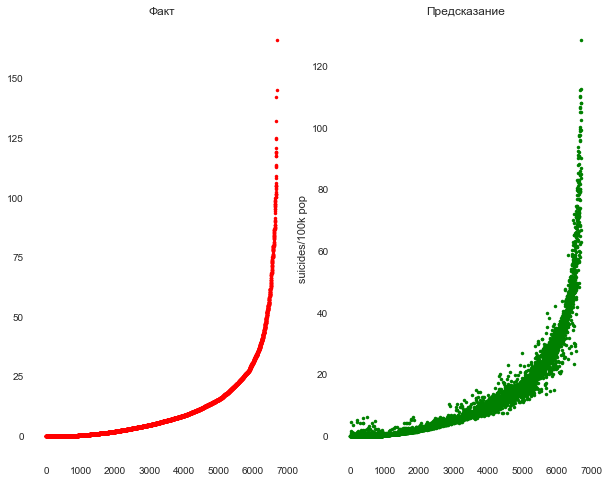

In [80]:
# Визуализация предсказаний 
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(10,8)) 
ax= axes.flatten()
plt.ylabel('suicides/100k pop')
x_line= list(range(0,len(y_test)))
ax[0].plot(x_line,y_vals.iloc[:,0].values, "r.")
ax[1].plot(x_line,y_vals.iloc[:,1].values, "g.")

ax[0].set_title("Факт")
ax[1].set_title("Предсказание")
plt.show()

Получается разброс есть и вероятность ошибки есть. 

### А теперь поработаем с сетом, где я собрала нулевые значения HDI for year

In [81]:
data_nan.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           0.0      2,156,624,900                 796   
1  Albania1987           0.0      2,156,624,900                 796   
2  Albania1987           0.0      2,156,624,900                 796   
3  Albania1987           0.0      2,156,624,900                 796   
4  Albania1987           0.0      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

- Учитывая полученные ранее корреляции и важность атрибутов, я удалю столбцы : generation, country-year( не раскладывая) и HDI for year ( он не несет информацию)

In [82]:
data_nan = data_nan.drop(['generation'], axis=1)
data_nan = data_nan.drop(['country-year'], axis=1)
data_nan = data_nan.drop(['HDI for year'], axis=1)

In [83]:
data_nan.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

   gdp_for_year ($)   gdp_per_capita ($)  
0      2,156,624,900                 796  
1      2,156,624,900                 796  
2      2,156,624,900                 796  
3      2,156,624,900                 796  
4      2,156,624,900                 796

In [84]:
data_nan['age_enc'] = labelEnc.fit_transform(data_nan['age'])
data_nan.drop(['age'], axis=1, inplace=True)
data_nan['sex_enc'] = labelEnc.fit_transform(data_nan['sex']) # используем этот метод кодировки
data_nan.drop(['sex'], axis=1, inplace=True)

In [85]:
try:
    data_nan[' gdp_for_year ($) '] = data_nan[' gdp_for_year ($) '].str.replace(",","").astype("int64")
except Exception as e:
    pass

In [86]:
data_nan.head()

suicides_no  population  suicides/100k pop   gdp_for_year ($)   \
0           21      312900               6.71          2156624900   
1           16      308000               5.19          2156624900   
2           14      289700               4.83          2156624900   
3            1       21800               4.59          2156624900   
4            9      274300               3.28          2156624900   

   gdp_per_capita ($)  age_enc  sex_enc  
0                 796        0        1  
1                 796        2        1  
2                 796        0        0  
3                 796        5        1  
4                 796        1        1

In [87]:
# делим на признаки и таргетную переменную
X = data_nan.drop(['suicides/100k pop'],axis=1)
y = data_nan['suicides/100k pop']

In [88]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size =0.8)

In [89]:
# Обучаем модель
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [90]:
headers = list(X_train.columns.values)
# Важность признаков
feature_imp = pd.Series(model.feature_importances_, index=headers).sort_values(ascending=False)
# Важность посмотрим в ДФ 
pd.DataFrame(feature_imp)

0
suicides_no         0.466813
population          0.422582
sex_enc             0.052178
age_enc             0.025165
 gdp_for_year ($)   0.019172
gdp_per_capita ($)  0.014090

*Важность каждого атрибута выросла.* 

In [91]:
# Значения у из тестовой выборки
y_vals = pd.DataFrame({"suicides/100k pop":y_test})

# Предсказанные значения 
y_vals["Prediction"] = model.predict(X_test).tolist()
y_vals.sort_values(by="suicides/100k pop", inplace=True)

y_vals.tail(15)

suicides/100k pop  Prediction
20506             154.92    120.0446
21764             157.48     73.3917
11436             161.92    151.5891
11460             162.67    145.8644
20446             170.86    133.0789
20494             172.86    127.8439
20518             173.86    116.2138
20470             176.33    145.2764
11364             176.91    142.9920
11388             177.57    152.5458
11376             177.61    148.2497
20530             182.32    112.7170
20542             185.37    126.7100
22280             204.92     91.1464
1258              224.97     91.4331

- Предсказание стало значительно хуже. Возможно и правильно, что надо убрать все нулевые значения из сета. 

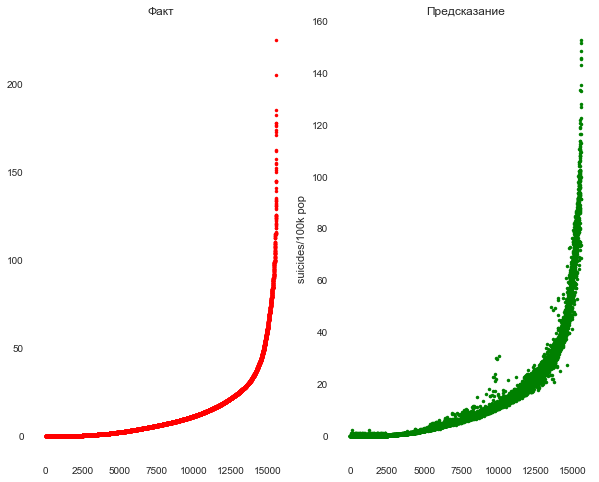

In [92]:
# Визуализация предсказаний 
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(10,8)) 
ax= axes.flatten()
plt.ylabel('suicides/100k pop')
x_line= list(range(0,len(y_test)))
ax[0].plot(x_line,y_vals.iloc[:,0].values, "r.")
ax[1].plot(x_line,y_vals.iloc[:,1].values, "g.")

ax[0].set_title("Факт")
ax[1].set_title("Предсказание")
plt.show()

- Хотя если судить по графику , мне кажется он более "причесан".

### А теперь я хочу попробовать обучить линейную модель.  

In [93]:
data = pd.read_csv('data.csv')
data.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           NaN      2,156,624,900                 796   
1  Albania1987           NaN      2,156,624,900                 796   
2  Albania1987           NaN      2,156,624,900                 796   
3  Albania1987           NaN      2,156,624,900                 796   
4  Albania1987           NaN      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [94]:
data = data.drop(['generation'], axis=1)
data = data.drop(['country-year'], axis=1)
data = data.drop(['HDI for year'], axis=1)

In [95]:
try:
    data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].str.replace(",","").astype("int64")
except Exception as e:
    pass

In [96]:
data.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

    gdp_for_year ($)   gdp_per_capita ($)  
0          2156624900                 796  
1          2156624900                 796  
2          2156624900                 796  
3          2156624900                 796  
4          2156624900                 796

In [97]:
X = data.drop(['suicides/100k pop'],axis=1)
y = data['suicides/100k pop']

In [98]:
X = pd.get_dummies(X)
X.head()

suicides_no  population   gdp_for_year ($)   gdp_per_capita ($)  \
0           21      312900          2156624900                 796   
1           16      308000          2156624900                 796   
2           14      289700          2156624900                 796   
3            1       21800          2156624900                 796   
4            9      274300          2156624900                 796   

   sex_female  sex_male  age_15-24 years  age_25-34 years  age_35-54 years  \
0           0         1                1                0                0   
1           0         1                0                0                1   
2           1         0                1                0                0   
3           0         1                0                0                0   
4           0         1                0                1                0   

   age_5-14 years  age_55-74 years  age_75+ years  
0               0                0              0  
1               0                0              0  
2               0                0              0  
3               0                0              1  
4               0                0              0

In [99]:
X.shape

(27820, 12)

- Я думаю признаков не много и применение PCA здесь не имеет смысла.

In [100]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size =0.8)

In [101]:
estimator = LinearRegression()
estimator.fit(X_train,y_train) # обучаем модель

predictions = estimator.predict(X_test)
print(mean_absolute_error (y_test,predictions))

9.46276958535692


- Попробуем улучшить данные 

In [102]:
from sklearn import preprocessing
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [103]:
# проведем стандартизацию данных 
stand_scaler = StandardScaler()
X_stand = stand_scaler.fit_transform(X)
X_stand = pd.DataFrame(X_stand, columns=X.columns)
X_stand.head(5)

suicides_no  population   gdp_for_year ($)   gdp_per_capita ($)  \
0    -0.245639   -0.391617           -0.305056           -0.850864   
1    -0.251182   -0.392870           -0.305056           -0.850864   
2    -0.253400   -0.397548           -0.305056           -0.850864   
3    -0.267811   -0.466035           -0.305056           -0.850864   
4    -0.258943   -0.401485           -0.305056           -0.850864   

   sex_female  sex_male  age_15-24 years  age_25-34 years  age_35-54 years  \
0        -1.0       1.0         2.234526        -0.447522        -0.447522   
1        -1.0       1.0        -0.447522        -0.447522         2.234526   
2         1.0      -1.0         2.234526        -0.447522        -0.447522   
3        -1.0       1.0        -0.447522        -0.447522        -0.447522   
4        -1.0       1.0        -0.447522         2.234526        -0.447522   

   age_5-14 years  age_55-74 years  age_75+ years  
0       -0.445669        -0.447522      -0.447522  
1       -0.445669        -0.447522      -0.447522  
2       -0.445669        -0.447522      -0.447522  
3       -0.445669        -0.447522       2.234526  
4       -0.445669        -0.447522      -0.447522

In [104]:
X_train, X_test, y_train , y_test = train_test_split(X_stand,y, test_size =0.8)

In [105]:
estimator = LinearRegression()
estimator.fit(X_train,y_train) # обучаем модель

predictions = estimator.predict(X_test)
print(mean_absolute_error (y_test,predictions))

9.506621264570605


- После стандартизации данных ошибка предсказания немного уменьшила.